# Visualizing Confirmed Cases of Covid19 

## Objectives

- To illustrate the spread of covid19 throughout South Africa.
- Using Geopandas and Python to generate graphs
- Creating an animation GIF 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd



import warnings
warnings.filterwarnings('ignore')

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
df = pd.read_csv(r"C:\Users\cheml\Desktop\csv_files\confirmed cases zar.csv")
df.head()

,province,3/5/2020,3/7/2020,3/8/2020,3/9/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,3/15/2020,...,7/14/2020,7/15/2020,7/16/2020,7/17/2020,7/18/2020,7/19/2020,7/20/2020,7/21/2020,7/22/2020,7/23/2020
0,EC,0,0,0,0,0,0,0,0,0,...,53959,55584,57186,58860,60976,63181,65316,66759,67818,69445
1,FS,0,0,0,0,0,0,0,0,0,...,5973,6561,7312,8290,9004,9993,10727,11352,12332,13443
2,GP,0,1,1,1,5,6,10,17,24,...,107070,112714,117895,123408,128604,133617,136879,139435,144582,148854
3,KZN,1,1,2,6,7,8,10,11,12,...,30587,32939,35604,37722,40086,43215,45614,47685,50521,53406
4,LP,0,0,0,0,0,0,0,0,0,...,3458,3645,3883,4160,4490,4928,5156,5355,5712,6068


In [3]:
df.shape

(10, 138)

In [4]:
from descartes import PolygonPatch

In [5]:
# Read S.A map shapefile

jozi = gpd.read_file(r"C:\Users\cheml\Desktop\Data Science\PR_SA_2011.shp")

<AxesSubplot:>

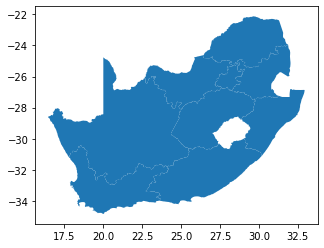

In [6]:
jozi.plot()

In [7]:
jozi.head()

,PR_MDB_C,PR_CODE,PR_NAME,AREA_SQKM,SHAPE_Leng,SHAPE_Area,geometry
0,EC,2.0,Eastern Cape,168965.967455,28.206381,16.154667,"POLYGON ((29.02187 -30.00443, 29.02401 -30.005..."
1,FS,4.0,Free State,129825.156440,24.249596,11.979428,"POLYGON ((27.97704 -26.67141, 27.97754 -26.671..."
2,GT,7.0,Gauteng,18178.305525,10.967065,1.640382,"POLYGON ((28.75833 -25.14728, 28.75915 -25.149..."
3,KZN,5.0,KwaZulu-Natal,94361.317676,19.024784,8.715379,"MULTIPOLYGON (((30.51695 -30.66308, 30.51675 -..."
4,LIM,9.0,Limpopo,125753.969538,21.859564,11.141413,"POLYGON ((29.65523 -22.12508, 29.65645 -22.125..."


In [8]:
jozi = jozi.drop(columns = ['PR_CODE', 'PR_NAME', 'AREA_SQKM', 'SHAPE_Leng', 'SHAPE_Area'])
jozi

,PR_MDB_C,geometry
0,EC,"POLYGON ((29.02187 -30.00443, 29.02401 -30.005..."
1,FS,"POLYGON ((27.97704 -26.67141, 27.97754 -26.671..."
2,GT,"POLYGON ((28.75833 -25.14728, 28.75915 -25.149..."
3,KZN,"MULTIPOLYGON (((30.51695 -30.66308, 30.51675 -..."
4,LIM,"POLYGON ((29.65523 -22.12508, 29.65645 -22.125..."
5,MP,"POLYGON ((31.80952 -23.99884, 31.81254 -23.999..."
6,NW,"POLYGON ((26.41890 -24.65507, 26.41923 -24.655..."
7,NC,"POLYGON ((20.04457 -24.81093, 20.04478 -24.810..."
8,WC,"MULTIPOLYGON (((18.15928 -33.36452, 18.15929 -..."


In [9]:
jozi.replace('GT', 'GP', inplace=True)
jozi.replace('LIM', 'LP', inplace=True)

In [10]:
jozi = jozi.rename(columns={'PR_MDB_C':'province'})

In [11]:
# merging 'df' with 'jozi' geopandas geopandadataframe

merge = jozi.merge(df, on='province')
merge

,province,geometry,3/5/2020,3/7/2020,3/8/2020,3/9/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,...,7/14/2020,7/15/2020,7/16/2020,7/17/2020,7/18/2020,7/19/2020,7/20/2020,7/21/2020,7/22/2020,7/23/2020
0,EC,"POLYGON ((29.02187 -30.00443, 29.02401 -30.005...",0,0,0,0,0,0,0,0,...,53959,55584,57186,58860,60976,63181,65316,66759,67818,69445
1,FS,"POLYGON ((27.97704 -26.67141, 27.97754 -26.671...",0,0,0,0,0,0,0,0,...,5973,6561,7312,8290,9004,9993,10727,11352,12332,13443
2,GP,"POLYGON ((28.75833 -25.14728, 28.75915 -25.149...",0,1,1,1,5,6,10,17,...,107070,112714,117895,123408,128604,133617,136879,139435,144582,148854
3,KZN,"MULTIPOLYGON (((30.51695 -30.66308, 30.51675 -...",1,1,2,6,7,8,10,11,...,30587,32939,35604,37722,40086,43215,45614,47685,50521,53406
4,LP,"POLYGON ((29.65523 -22.12508, 29.65645 -22.125...",0,0,0,0,0,0,0,0,...,3458,3645,3883,4160,4490,4928,5156,5355,5712,6068
5,MP,"POLYGON ((31.80952 -23.99884, 31.81254 -23.999...",0,0,0,0,0,1,1,1,...,4576,5051,5572,6073,6644,7129,7424,7664,8286,8987
6,NW,"POLYGON ((26.41890 -24.65507, 26.41923 -24.655...",0,0,0,0,0,0,0,0,...,10784,11225,11891,12722,13400,14006,14337,14634,15073,15901
7,NC,"POLYGON ((20.04457 -24.81093, 20.04478 -24.810...",0,0,0,0,0,0,0,0,...,1579,1667,1831,2044,2197,2266,2351,2539,2727,2970
8,WC,"MULTIPOLYGON (((18.15928 -33.36452, 18.15929 -...",0,0,0,0,1,1,3,9,...,80199,81556,82986,84254,85411,85926,85772,86329,87847,88928


In [12]:
merge.shape

(9, 139)

In [13]:
merge.columns.to_list()

['province',
 'geometry',
 '3/5/2020',
 '3/7/2020',
 '3/8/2020',
 '3/9/2020',
 '3/11/2020',
 '3/12/2020',
 '3/13/2020',
 '3/14/2020',
 '3/15/2020',
 '3/16/2020',
 '3/17/2020',
 '3/18/2020',
 '3/19/2020',
 '3/20/2020',
 '3/21/2020',
 '3/22/2020',
 '3/23/2020',
 '3/24/2020',
 '3/25/2020',
 '3/26/2020',
 '3/28/2020',
 '3/29/2020',
 '3/30/2020',
 '3/31/2020',
 '4/1/2020',
 '4/2/2020',
 '4/3/2020',
 '4/4/2020',
 '4/5/2020',
 '4/6/2020',
 '4/8/2020',
 '4/9/2020',
 '4/10/2020',
 '4/11/2020',
 '4/12/2020',
 '4/13/2020',
 '4/14/2020',
 '4/15/2020',
 '4/16/2020',
 '4/17/2020',
 '4/18/2020',
 '4/19/2020',
 '4/20/2020',
 '4/21/2020',
 '4/22/2020',
 '4/23/2020',
 '4/24/2020',
 '4/25/2020',
 '4/26/2020',
 '4/27/2020',
 '4/28/2020',
 '4/29/2020',
 '4/30/2020',
 '5/1/2020',
 '5/2/2020',
 '5/3/2020',
 '5/4/2020',
 '5/5/2020',
 '5/6/2020',
 '5/7/2020',
 '5/8/2020',
 '5/9/2020',
 '5/10/2020',
 '5/11/2020',
 '5/12/2020',
 '5/13/2020',
 '5/14/2020',
 '5/15/2020',
 '5/16/2020',
 '5/17/2020',
 '5/18/2020',
 

In [14]:
len(merge.columns.to_list())

139

In [15]:
merge.columns.to_list()[2:139]

['3/5/2020',
 '3/7/2020',
 '3/8/2020',
 '3/9/2020',
 '3/11/2020',
 '3/12/2020',
 '3/13/2020',
 '3/14/2020',
 '3/15/2020',
 '3/16/2020',
 '3/17/2020',
 '3/18/2020',
 '3/19/2020',
 '3/20/2020',
 '3/21/2020',
 '3/22/2020',
 '3/23/2020',
 '3/24/2020',
 '3/25/2020',
 '3/26/2020',
 '3/28/2020',
 '3/29/2020',
 '3/30/2020',
 '3/31/2020',
 '4/1/2020',
 '4/2/2020',
 '4/3/2020',
 '4/4/2020',
 '4/5/2020',
 '4/6/2020',
 '4/8/2020',
 '4/9/2020',
 '4/10/2020',
 '4/11/2020',
 '4/12/2020',
 '4/13/2020',
 '4/14/2020',
 '4/15/2020',
 '4/16/2020',
 '4/17/2020',
 '4/18/2020',
 '4/19/2020',
 '4/20/2020',
 '4/21/2020',
 '4/22/2020',
 '4/23/2020',
 '4/24/2020',
 '4/25/2020',
 '4/26/2020',
 '4/27/2020',
 '4/28/2020',
 '4/29/2020',
 '4/30/2020',
 '5/1/2020',
 '5/2/2020',
 '5/3/2020',
 '5/4/2020',
 '5/5/2020',
 '5/6/2020',
 '5/7/2020',
 '5/8/2020',
 '5/9/2020',
 '5/10/2020',
 '5/11/2020',
 '5/12/2020',
 '5/13/2020',
 '5/14/2020',
 '5/15/2020',
 '5/16/2020',
 '5/17/2020',
 '5/18/2020',
 '5/19/2020',
 '5/20/2020',

In [16]:
import PIL
import io

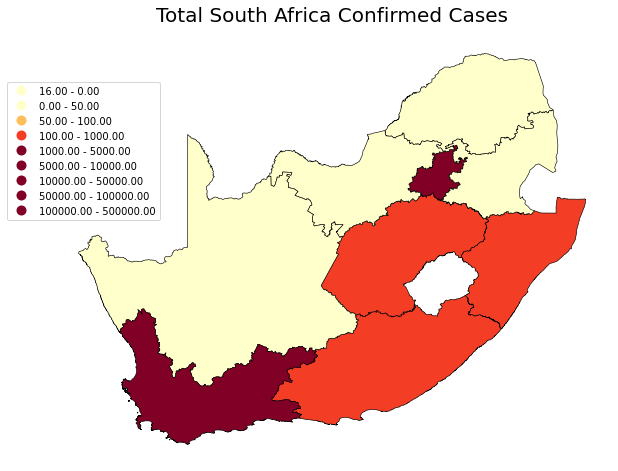

In [20]:
ax = merge.plot(column = '4/23/2020', cmap = 'YlOrRd',
                   figsize = (10,10),
                   legend = True,
                   scheme = 'user_defined',
                   classification_kwds ={'bins':[0, 50, 100, 1000, 5000, 10000, 50000, 100000, 500000]},
                   edgecolor = 'black',
                   linewidth = 0.6)
                   
# Add title to the Map
ax.set_title('Total South Africa Confirmed Cases', fontdict = {'fontsize':20}, pad =12.5)

#Removing the axes
ax.set_axis_off()

#Moving the Legend

ax.get_legend().set_bbox_to_anchor((0.20, 0.9))




In [18]:
image_frames = []

In [19]:
for dates in merge.columns.to_list()[2:139]:
    #Plot

    ax = merge.plot(column = dates, cmap = 'YlOrRd',
                   figsize = (14,14),
                   legend = True,
                   scheme = 'user_defined',
                   classification_kwds ={'bins':[0, 50, 100, 1000, 5000, 10000, 50000, 100000, 500000]},
                   edgecolor = 'black',
                   linewidth = 0.6)
                   

    # Add a title to the map
    ax.set_title('Total Confirmed Cases In South Africa: ' + dates,
                fontdict = {'fontsize':20}, pad =12.5)

    # Removing the axes

    ax.set_axis_off()

    # Move the Legend

    ax.get_legend().set_bbox_to_anchor((0.20, 0.9))
    
    img = ax.get_figure()
    
    f = io.BytesIO()
    img.savefig(f, format = 'png')
    f.seek(0)
    image_frames.append(PIL.Image.open(f))
    
# Create a GIF Animation

image_frames[0].save('SA Dynamic Covid-19 Map.gif', format = 'GIF',
                    append_images = image_frames[1:],
                    save_all = True, durations = 300,
                    loop = 3)
    
f.close()